In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import chart_studio.plotly
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.datasets import make_classification
import itertools


In [2]:
ufc = pd.read_csv(os.path.join("resources/clean.csv"))
ufc.head()

,Unnamed: 0,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
0,0,1,1,23.0,182.0,2783,84,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,red
1,1,0,0,32.0,175.0,2208,70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blue
2,2,2,0,38.0,172.0,721,70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,red
3,3,0,0,23.0,170.0,2825,56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blue
4,4,3,1,30.0,167.0,2260,61,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,red


In [3]:
ufc = ufc[ufc.winner != 'no contest']
ufc = ufc[ufc.winner != 'draw']
#ufc_zero = ufc.fillna(0)
ufc_zero = ufc.copy()
ufc_zero.head()

,Unnamed: 0,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
0,0,1,1,23.0,182.0,2783,84,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,red
1,1,0,0,32.0,175.0,2208,70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blue
2,2,2,0,38.0,172.0,721,70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,red
3,3,0,0,23.0,170.0,2825,56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,blue
4,4,3,1,30.0,167.0,2260,61,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,red


In [4]:
#df=ufc.drop(columns= ['winby'])

In [5]:
y = ufc_zero['winner']
X = ufc_zero.drop(columns = 'winner')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [6]:
#X_train

In [7]:
#X_test

In [8]:
#y_train

In [9]:
#y_test

In [10]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred= logreg.predict(X_test)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
y_pred

array(['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red',
       'red', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red',
       'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'red',
       'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue',
       'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue',
       'blue', 'red', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue',
       'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'red',
       'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue

In [12]:
accuracy_score(y_test, y_pred)

0.5509641873278237

In [13]:
y_train.value_counts()

red     642
blue    446
Name: winner, dtype: int64

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 51,  87],
       [ 76, 149]])

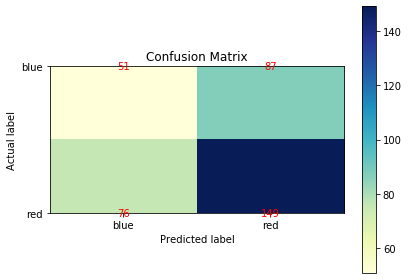

In [22]:
cm = confusion_matrix(y_test, y_pred)
classes = unique_labels(y_test, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap="YlGnBu")
ax.figure.colorbar(im, ax=ax)

   
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='Actual label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="red" if cm[i, j] > thresh else "red")
fig.tight_layout()
ax